In [1]:
%pylab inline
#from pylab import *

Populating the interactive namespace from numpy and matplotlib


In [4]:
#Define parameters
R_SS = 2.5*10.**-5 #Subsidence rate in m/yr
P = 10.**8 #Period of sea level oscillations in years
slope = 1./5000.
omega = 2.*pi/P #angular frequency
D = 2.5 *10**5 #m
Psi = R_SS/(slope*D*omega)

#Define timestep and number of steps
dt = 0.03
nsteps = 150
x = zeros(nsteps+1)
x[0] = 1./(Psi**2.+1)#0.
t = arange(nsteps+1)*dt
for tstep in arange(nsteps):
    dx_dt = -2.*pi*sin(2.*pi*t[tstep]) - 2.*pi*Psi*x[tstep]
    x_pred = x[tstep] + dt*dx_dt
    dx_dt_x_pred = -2.*pi*sin(2.*pi*t[tstep+1]) - 2.*pi*Psi*x_pred
    x[tstep+1] = x[tstep] + dt*(dx_dt + dx_dt_x_pred)/2.


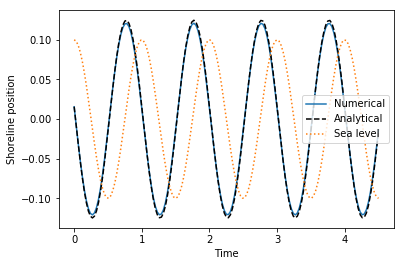

In [5]:
x_true = -1./sqrt(Psi**2. + 1.)*sin(2.*pi*t - arctan(1./Psi))
y_sl = 0.1*cos(2.*pi*t)
figure()
plot(t,x)
plot(t,x_true, 'k--')
plot(t,y_sl, ':')
legend(['Numerical', 'Analytical','Sea level'])
xlabel('Time')
ylabel('Shoreline position')